In [ ]:
New York City has published data on student SAT scores by high school, along with additional demographic data sets. Over the last three missions, we combined the following data sets into a single, clean pandas dataframe:

SAT scores by school - SAT scores for each high school in New York City
School attendance - Attendance information for each school in New York City
Class size - Information on class size for each school
AP test results - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
Graduation outcomes - The percentage of students who graduated, and other outcome information
Demographics - Demographic information for each school
School survey - Surveys of parents, teachers, and students at each school
New York City has a significant immigrant population and is very diverse, so comparing demographic factors such as race, income, and gender with SAT scores is a good way to determine whether the SAT is a fair test. For example, if certain racial groups consistently perform better on the SAT, we would have some evidence that the SAT is unfair.

In the last mission, we began performing some analysis. We'll extend that analysis in this mission. As you can see, we've included the code to read in all of the data, combine it, and create correlations in the notebook. If you'd like to see the finished notebook that contains solutions for all of the steps, you can find it in the GitHub repo for this mission.

The dataframe combined contains all of the data we'll be using in our analysis.

Instructions

Set up matplotlib to work in Jupyter notebook.
There are several fields in combined that originally came from a survey of parents, teachers, and students. Make a bar plot of the correlations between these fields and sat_score.
You can find a list of the fields in the survey_fields variable in the notebook.
Consult the data dictionary that's part of the zip file you can download from the City of New York's website.
Did you find any surprising correlations?
Write up your results in a Markdown cell.


In [16]:
import pandas as pd
data_files = [
    "2010__AP__College_Board__School_Level_Results.csv",
    "2010-2011_Class_Size_-_School-level_detail.csv",
    "2006_-_2012_School_Demographics_and_Accountability_Snapshot.csv",
    "2005-2010_Graduation_Outcomes_-_School_Level.csv",
    "2014_-_2015_DOE_High_School_Directory.csv",
    "2012_SAT_Results.csv"
]
data_old = {}
for f in data_files:
    d = pd.read_csv("schools/{0}".format(f))
    key_name = f.replace(".csv", "")
    data_old[key_name] = d
    
name_list = ["ap_2010",  "class_size",  "demographics",  "graduation", "hs_directory",  "sat_results", "survey_all",  "survey_d75" ]    
data = {}
for  position, f in enumerate(data_files):
    d = pd.read_csv("schools/{0}".format(f))
    key_name = name_list[position]
    data[key_name] = d
    



In [17]:
print(data_old.keys())

dict_keys(['2010__AP__College_Board__School_Level_Results', '2010-2011_Class_Size_-_School-level_detail', '2006_-_2012_School_Demographics_and_Accountability_Snapshot', '2005-2010_Graduation_Outcomes_-_School_Level', '2014_-_2015_DOE_High_School_Directory', '2012_SAT_Results'])


In [18]:

print(data.keys())

dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results'])


In [19]:
print(data["sat_results"].head())

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    38

In [20]:
for k in data:
    print(data[k].head())

      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K     

In [21]:
#Read in the surveys
all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)
print(survey.head())


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


     N_p    N_s   N_t  aca_p_11  aca_s_11  aca_t_11  aca_tot_11    bn  \
0   90.0    NaN  22.0       7.8       NaN       7.9         7.9  M015   
1  161.0    NaN  34.0       7.8       NaN       9.1         8.4  M019   
2  367.0    NaN  42.0       8.6       NaN       7.5         8.0  M020   
3  151.0  145.0  29.0       8.5       7.4       7.8         7.9  M034   
4   90.0    NaN  23.0       7.9       NaN       8.1         8.0  M063   

   com_p_11  com_s_11   ...    t_q8c_1  t_q8c_2  t_q8c_3 t_q8c_4  t_q9  \
0       7.6       NaN   ...       29.0     67.0      5.0     0.0   NaN   
1       7.6       NaN   ...       74.0     21.0      6.0     0.0   NaN   
2       8.3       NaN   ...       33.0     35.0     20.0    13.0   NaN   
3       8.2       5.9   ...       21.0     45.0     28.0     7.0   NaN   
4       7.9       NaN   ...       59.0     36.0      5.0     0.0   NaN   

   t_q9_1  t_q9_2  t_q9_3  t_q9_4  t_q9_5  
0     5.0    14.0    52.0    24.0     5.0  
1     3.0     6.0     3.0   

In [22]:
survey["DBN"] = survey["dbn"]

survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey.loc[:,survey_fields]
data["survey"] = survey

print(survey.head())

      DBN  rr_s  rr_t  rr_p    N_s   N_t    N_p  saf_p_11  com_p_11  eng_p_11  \
0  01M015   NaN    88    60    NaN  22.0   90.0       8.5       7.6       7.5   
1  01M019   NaN   100    60    NaN  34.0  161.0       8.4       7.6       7.6   
2  01M020   NaN    88    73    NaN  42.0  367.0       8.9       8.3       8.3   
3  01M034  89.0    73    50  145.0  29.0  151.0       8.8       8.2       8.0   
4  01M063   NaN   100    60    NaN  23.0   90.0       8.7       7.9       8.1   

      ...      eng_t_11  aca_t_11  saf_s_11  com_s_11  eng_s_11  aca_s_11  \
0     ...           7.6       7.9       NaN       NaN       NaN       NaN   
1     ...           8.9       9.1       NaN       NaN       NaN       NaN   
2     ...           6.8       7.5       NaN       NaN       NaN       NaN   
3     ...           6.8       7.8       6.2       5.9       6.5       7.4   
4     ...           7.8       8.1       NaN       NaN       NaN       NaN   

   saf_tot_11  com_tot_11  eng_tot_11  aca_tot_11 

In [23]:
#Add DBN columns
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return string_representation.zfill(2)
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]
print(data["class_size"].head())

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   
3    1       M        M015  P.S. 015 Roberto Clemente     01          CTT   
4    1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   
3                                    -                                   -   
4                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \


In [24]:
# Convert columns to numeric
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]
print(data['sat_results']['sat_score'].head())

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64


In [25]:
import re
def find_lat(loc):
    coords = re.findall("\(.+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)

print(data["hs_directory"].head())

      dbn                                        school_name    borough  \
0  17K548                Brooklyn School for Music & Theatre   Brooklyn   
1  09X543                   High School for Violin and Dance      Bronx   
2  09X327        Comprehensive Model School Project M.S. 327      Bronx   
3  02M280     Manhattan Early College School for Advertising  Manhattan   
4  28Q680  Queens Gateway to Health Sciences Secondary Sc...     Queens   

  building_code    phone_number    fax_number  grade_span_min  grade_span_max  \
0          K440    718-230-6250  718-230-6262             9.0              12   
1          X400    718-842-0687  718-589-9849             9.0              12   
2          X240    718-294-8111  718-294-8109             6.0              12   
3          M520  718-935-3477             NaN             9.0              10   
4          Q695    718-969-3155  718-969-3552             6.0              12   

   expgrade_span_min  expgrade_span_max         ...         pr

In [26]:
import re
def find_lon(loc):
    coords = re.findall("\(.+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

print(data["hs_directory"].head())

      dbn                                        school_name    borough  \
0  17K548                Brooklyn School for Music & Theatre   Brooklyn   
1  09X543                   High School for Violin and Dance      Bronx   
2  09X327        Comprehensive Model School Project M.S. 327      Bronx   
3  02M280     Manhattan Early College School for Advertising  Manhattan   
4  28Q680  Queens Gateway to Health Sciences Secondary Sc...     Queens   

  building_code    phone_number    fax_number  grade_span_min  grade_span_max  \
0          K440    718-230-6250  718-230-6262             9.0              12   
1          X400    718-842-0687  718-589-9849             9.0              12   
2          X240    718-294-8111  718-294-8109             6.0              12   
3          M520  718-935-3477             NaN             9.0              10   
4          Q695    718-969-3155  718-969-3552             6.0              12   

   expgrade_span_min  expgrade_span_max    ...      \
0       

In [27]:
# Condense datasets
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

print(class_size.head())


     CSD BOROUGH SCHOOL CODE                                    SCHOOL NAME  \
225    1       M        M292  Henry Street School for International Studies   
226    1       M        M292  Henry Street School for International Studies   
227    1       M        M292  Henry Street School for International Studies   
228    1       M        M292  Henry Street School for International Studies   
229    1       M        M292  Henry Street School for International Studies   

    GRADE  PROGRAM TYPE CORE SUBJECT (MS CORE and 9-12 ONLY)  \
225  09-12       GEN ED                              ENGLISH   
226  09-12       GEN ED                              ENGLISH   
227  09-12       GEN ED                              ENGLISH   
228  09-12       GEN ED                              ENGLISH   
229  09-12       GEN ED                                 MATH   

    CORE COURSE (MS CORE and 9-12 ONLY) SERVICE CATEGORY(K-9* ONLY)  \
225                           English 9                           -  

In [28]:
import numpy
class_size = class_size.groupby("DBN").agg(numpy.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size
print(data["class_size"].head())

      DBN  CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
0  01M292    1                            88.0000            4.000000   
1  01M332    1                            46.0000            2.000000   
2  01M378    1                            33.0000            1.000000   
3  01M448    1                           105.6875            4.750000   
4  01M450    1                            57.6000            2.733333   

   AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
0           22.564286                   18.50              26.571429   
1           22.000000                   21.00              23.500000   
2           33.000000                   33.00              33.000000   
3           22.231250                   18.25              27.062500   
4           21.200000                   19.40              22.866667   

   SCHOOLWIDE PUPIL-TEACHER RATIO  
0                             NaN  
1                             NaN  
2                   

In [29]:

data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]
print(data["demographics"].head())

       DBN                                              Name  schoolyear  \
6   01M015  P.S. 015 ROBERTO CLEMENTE                           20112012   
13  01M019  P.S. 019 ASHER LEVY                                 20112012   
20  01M020  PS 020 ANNA SILVER                                  20112012   
27  01M034  PS 034 FRANKLIN D ROOSEVELT                         20112012   
35  01M063  PS 063 WILLIAM MCKINLEY                             20112012   

   fl_percent  frl_percent  total_enrollment prek    k grade1 grade2  \
6         NaN         89.4               189   13   31     35     28   
13        NaN         61.5               328   32   46     52     54   
20        NaN         92.5               626   52  102    121     87   
27        NaN         99.7               401   14   34     38     36   
35        NaN         78.9               176   18   20     30     21   

      ...     black_num black_per hispanic_num hispanic_per white_num  \
6     ...            63      33.3    

In [30]:

2
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
# Below is a fitering not assigning to Total Cohort
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]
4
print(data["graduation"].head())


     Demographic     DBN                            School Name Cohort  \
3   Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL   2006   
10  Total Cohort  01M448    UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   2006   
17  Total Cohort  01M450             EAST SIDE COMMUNITY SCHOOL   2006   
24  Total Cohort  01M509                MARTA VALLE HIGH SCHOOL   2006   
31  Total Cohort  01M515  LOWER EAST SIDE PREPARATORY HIGH SCHO   2006   

    Total Cohort Total Grads - n Total Grads - % of cohort Total Regents - n  \
3             78              43                      55.1                36   
10           124              53                      42.7                42   
17            90              70                      77.8                67   
24            84              47                        56                40   
31           193             105                      54.4                91   

   Total Regents - % of cohort Total Regents - % of grads  \
3            

In [31]:
# Convert AP scores to numeric
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")
print(data["ap_2010"].dtypes)


DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object


In [33]:
# Combine the datasets
combined = data["sat_results"]
combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")
print(combined.head(5))
print(combined.shape)

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                      7                            414.0   
4                     44                            390.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3                401.0      

In [34]:

to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

print(combined.head(5))
print(combined.shape)

      DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                     44                            390.0   
4                    159                            522.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3   

In [35]:

combined = combined.fillna(combined.mean())
# if there is no numerica mean, then fill with zero
combined = combined.fillna(0)

print(combined.head(5))

      DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                     44                            390.0   
4                    159                            522.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3   

In [36]:
# Add a school district column for mapping
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)
print(combined["school_dist"].head())

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object


In [37]:
# Find correlations

correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)

'''
Unsurprisingly, SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score, and sat_score are 
strongly correlated with sat_score.

We can also make some other observations:

total_enrollment has a strong positive correlation with sat_score.
This is surprising because we'd expect smaller schools where students receive more attention to have higher scores. 
However, it looks like the opposite is true -- larger schools tend to do better on the SAT.

Other columns that are proxies for enrollment correlate similarly. 
These include total_students, N_s, N_p, N_t, AP Test Takers, Total Exams Taken, and NUMBER OF SECTIONS.

Both the percentage of females (female_per) and number of females (female_num) at a school correlate positively with SAT score, whereas the percentage of males (male_per) and the number of males (male_num) correlate negatively. This could indicate that women do better on the SAT than men.

Teacher and student ratings of school safety (saf_t_11, and saf_s_11) correlate with sat_score.

Student ratings of school academic standards (aca_s_11) correlate with sat_score, 
but this does not hold for ratings from teachers and parents (aca_p_11 and aca_t_11).

There is significant racial inequality in SAT scores (white_per, asian_per, black_per, hispanic_per).

The percentage of English language learners at the school (ell_percent, frl_percent) 
has a strong negative correlation with SAT scores.
Because enrollment seems to have such a strong correlation, 
let's make a scatterplot of total_enrollment vs sat_score. Each point in the scatterplot will represent a high school, so we'll be able to see if there are any interesting patterns.

We can plot columns in a dataframe using the pandas.DataFrame.plot() accessor on a dataframe.
We can also specify a certain plot type. For example, df.plot.scatter(x="A", y="b") 
will create a scatterplot of columns A and B.
'''

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent         

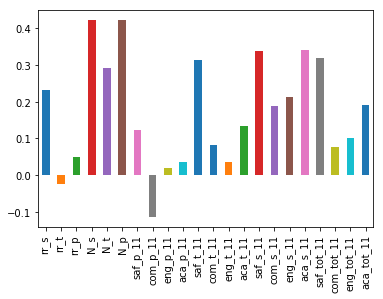

In [57]:
# Plotting survey correlations

# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
import matplotlib.pyplot as plt
%matplotlib inline
survey_fields.remove("DBN")

%matplotlib inline
combined.corr()["sat_score"][survey_fields].plot.bar()


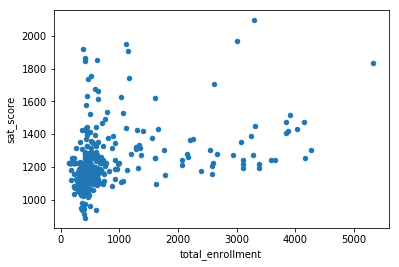

In [39]:

import matplotlib.pyplot as plt
%matplotlib inline
combined.plot.scatter(x='total_enrollment', y='sat_score')
3
plt.show()


In [40]:

'''
Judging from the plot we just created, it doesn't appear that there's an extremely strong correlation between
sat_score and total_enrollment. 
If there was a very strong correlation, we'd expect all of the points to line up. 

Instead, there's a large cluster of schools, and then a few others going off in three different directions.

However, there's an interesting cluster of points at the bottom left where total_enrollment and sat_score are both low. This cluster may be what's making the r value so high. It's worth extracting the names of the schools in this cluster so we can research them further.

Instructions

Filter the combined dataframe to keep only those rows where total_enrollment is under 1000 and sat_score is under 1000. Assign the result to low_enrollment.
Display all of the items in the School Name column of low_enrollment.
Use Wikipedia and Google to research the names of the schools. Can you discover anything interesting about them?

'''
low_enrollment = combined[combined["total_enrollment"] < 1000]
low_enrollment = low_enrollment[low_enrollment["sat_score"] < 1000]
print(low_enrollment["School Name"])

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object


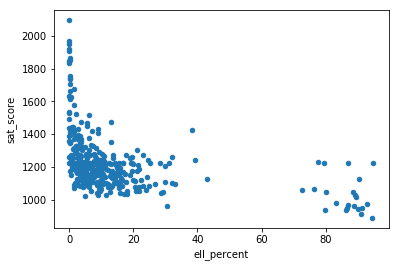

In [41]:
'''
however, there's an interesting cluster of points at the bottom left 
where total_enrollment and sat_score are both low. This cluster may be what's making the r value so high. 
It's worth extracting the names of the schools in this cluster so we can research them further.
Our research on the last screen revealed that most of the high schools with low total enrollment 
and low SAT scores have high percentages of English language learners.
This indicates that it's actually ell_percent that correlates strongly with sat_score, 
rather than total_enrollment. To explore this relationship further, let's plot out ell_percent vs sat_score.

'''

combined.plot.scatter(x='ell_percent', y='sat_score')
plt.show()

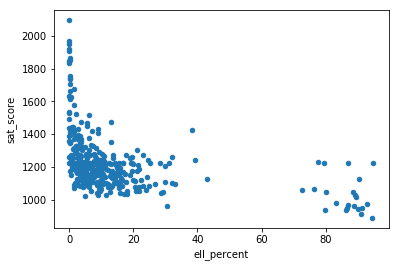

In [43]:
'''
Our research on the last screen revealed that most of the high schools with low total enrollment and low SAT scores have high percentages of English language learners. This indicates that it's actually ell_percent that correlates strongly with sat_score, rather than total_enrollment. To explore this relationship further, let's plot out ell_percent vs sat_score.

Instructions

Create a scatterplot of ell_percent versus sat_score.
'''

combined.plot.scatter(x='ell_percent', y='sat_score')
plt.show()


In [50]:
'''
It looks like ell_percent correlates with sat_score more strongly, because the scatterplot is more linear. However, there's still the cluster of schools that have very high ell_percent values and low sat_score values. This cluster represents the same group of international high schools we investigated earlier.

In order to explore this relationship, we'll want to map out ell_percent by school district. The map will show us which areas of the city have a lot of English language learners.

We learned how to use the Basemap package to create maps in the Visualizing Geographic Data mission. The Basemap package enables us to create high-quality maps, plot points over them, and then draw coastlines and other features.

We extracted the coordinates for all of the schools earlier, and stored them in the lat and lon columns. The coordinates will enable us to plot all of the schools on a map of New York City.

We can set up the map with this code:

This code snippet will create a map that centers on New York City 
(llcrnrlat, urcrnrlat, llcrnrlon, and urcrnrlon define the corners of the geographic area the map depicts). 
It will also draw coastlines and rivers accordingly.

Now all we need to do is convert our lat and lon coordinates to x and y coordinates so we can plot them 
on top of the map. This will show us where all of the schools in our data set are located.

As you may recall, in order to plot coordinates using Basemap, we need to:

Convert the pandas series containing the latitude and longitude coordinates to lists using 
the pandas.Series.tolist() method.
Make a scatterplot using the longitudes and latitudes with the scatter() method on the Basemap object.
Show the plot using the pyplot.show() method.
We also need to make sure we pass a few keyword arguments to the scatter() method:

s - Determines the size of the point that represents each school on the map.
zorder - Determines where the method draws the points (that represent schools) on the z axis. 
In other words, it determines the order of the layers on the map. 
If we set zorder to 2, the method will draw the points on top of the continents, which is where we want them.
latlon - A Boolean value that specifies whether we're passing in latitude and longitude coordinates 
instead of x and y plot coordinates.

'''

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline


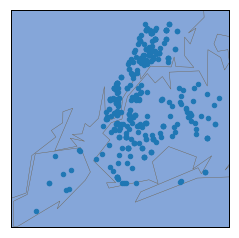

In [52]:

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True)
plt.show()


In [ ]:

From the map above, we can see that school density is highest in Manhattan (the top of the map), and lower in Brooklyn, the Bronx, Queens, and Staten Island.

Now that we've plotted the school locations, we can begin to display meaningful information on the maps, such as the percentage of English language learners by area.

We can shade each point in the scatterplot by passing the keyword argument c into the scatter() method. This argument accepts a variable containing a sequence of numbers, assigns different colors to those numbers, and then shades the points on the plot associated with those numbers accordingly.

The method will convert the sequence of numbers we pass into the c keyword argument to values ranging from 0 to 1. It will then map these values onto a colormap. Matplotlib has quite a few default colormaps. In our case, we'll use the summer colormap, which results in green points for low numbers, and yellow points for high numbers.

For example, let's say we plotted ell_percent by school. If we pass in the keyword argument c=combined["ell_percent"], then the method would shade a school with a high ell_percent yellow, and a school with a low ell_percent green. We can specify the colormap we want to use by passing the cmap keyword argument to the scatter() method.

Instructions

Set up the map using the code snippet that creates a map, then draws rivers, coastlines, and boundaries.
Call the scatter() method on m, and pass in longitudes and latitudes as arguments.
Make sure to pass in longitudes and latitudes in the correct order.
Pass in the keyword argument s=20 to increase the size of the points in the scatterplot.
Pass in the keyword argument zorder=2 to plot the points on top of the rest of the map. Otherwise the method will draw the points underneath the land.
Pass in the keyword argument latlon=True to indicate that we're passing in latitude and longitude coordinates, rather than axis coordinates.
Pass in the keyword argument c with the value combined["ell_percent"] to plot the ell_percent.
Pass in the keyword argument cmap="summer" to get the right color scheme.
Show the plot using the show() method.

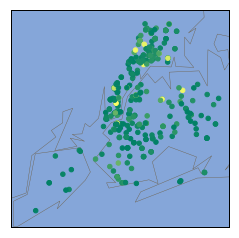

In [53]:

from mpl_toolkits.basemap import Basemap

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=combined["ell_percent"], cmap="summer")
plt.show()

In [ ]:
Unfortunately, due to the number of schools, it's hard to interpret the map we made on the last screen. It looks like uptown Manhattan and parts of Queens have a higher ell_percent, but we can't be sure. One way to make very granular statistics easier to read is to aggregate them. In this case, we can aggregate by district, which will enable us to plot ell_percent district-by-district instead of school-by-school.

In the last mission, we used the pandas.DataFrame.groupby() followed by the agg() method on the resulting object to find the mean class size for each unique DBN. The principle is exactly the same, except that here we'd find the mean of each column for each unique value in school_dist.

Instructions

Find the average values for each column for each school_dist in combined.
Use the pandas.DataFrame.groupby() method to group combined by school_dist.
Use the agg() method, along with the numpy.mean function as an argument, to calculate the average of each group.
Assign the result to the variable districts.
Reset the index of districts, making school_dist a column again.
Use the pandas.DataFrame.reset_index() method with the keyword argument inplace=True.
Display the first few rows of districts to verify that everything went okay.

In [54]:
import numpy
districts = combined.groupby("school_dist").agg(numpy.mean)
districts.reset_index(inplace=True)
print(districts.head())

  school_dist  SAT Critical Reading Avg. Score  SAT Math Avg. Score  \
0          01                       441.833333           473.333333   
1          02                       426.619092           444.186256   
2          03                       428.529851           437.997512   
3          04                       402.142857           416.285714   
4          05                       427.159915           438.236674   

   SAT Writing Avg. Score    sat_score  AP Test Takers   Total Exams Taken  \
0              439.333333  1354.500000       116.681090         173.019231   
1              424.832836  1295.638184       128.908454         201.516827   
2              426.915672  1293.443035       156.183494         244.522436   
3              405.714286  1224.142857       129.016484         183.879121   
4              419.666098  1285.062687        85.722527         115.725275   

   Number of Exams with scores 3 4 or 5  Total Cohort  CSD    ...      \
0                            13

In [ ]:
Now that we've taken the means of all of the columns, we can plot out ell_percent by district. Not only did we find the mean of ell_percent, but we also took the means of the lon and lat columns, which will give us the coordinates for the center of each district.

Instructions

Use the code snippet from before that creates a map, then draws rivers, coastlines, and boundaries.
Convert the lon column of districts to a list, and assign it to the longitudes variable.
Convert the lat column of districts to a list, and assign it to the latitudes variable.
Call the scatter() method on m, and pass in longitudes and latitudes as arguments.
Make sure to pass in longitudes and latitudes in the correct order.
Pass in the keyword argument s=50 to increase the size of the points in the scatterplot.
Pass in the keyword argument zorder=2 to plot the points on top of the rest of the map. Otherwise the method will draw the points underneath the land.
Pass in the keyword argument latlon=True to indicate that we're passing in latitude and longitude coordinates, rather than axis coordinates.
Pass in the keyword argument c with the value districts["ell_percent"] to plot the ell_percent.
Pass in the keyword argument cmap="summer" to get the right color scheme.
Show the plot using the show() method.

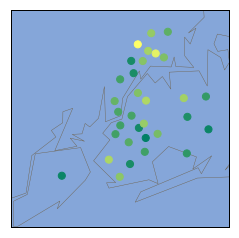

In [55]:

from mpl_toolkits.basemap import Basemap

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["ell_percent"], cmap="summer")
plt.show()

In [ ]:
In this mission, we found correlations, created visualizations, and mapped out our schools! Now we have all the tools we need to analyze the data in greater depth.

Along the way, we learned:

How to create school and district-level maps
How to find correlations, and what those correlations mean
Why we should plot data out, rather than relying on the r value alone
That ell_percent has a strong negative correlation with sat_score
We now have the skills to analyze data sets and explain the quirks we find. These are essential skills for any data science professional.

Next, we'll use the skills and tools we've developed to analyze the New York City high school data more fully in a guided project.

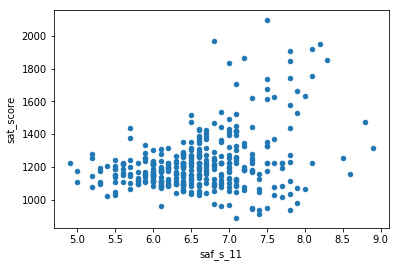

In [59]:
# Exploring safety

combined.plot.scatter("saf_s_11","sat_score")

'''
There appears to be a correlation between SAT scores and safety, 
although it isn't thatstrong. 
It looks like there are a few schools with extremely high SAT scores 
and high safety scores. There are a few schools with low safety scores 
and low SAT scores. No school with a safety score lower than 6.5 
has an average SAT score higher than 1500 or so.
'''

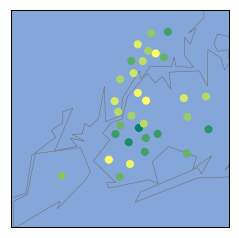

In [60]:
# Plotting safety

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

districts = combined.groupby("school_dist").agg(numpy.mean)
districts.reset_index(inplace=True)

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)


longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["saf_s_11"], cmap="summer")
plt.show()

'''
It looks like Upper Manhattan and parts of Queens and the Bronx tend to have higher safety scores, whereas Brooklyn has low safety scores.
'''

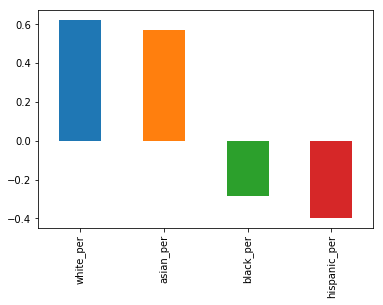

In [62]:
# Racial differences in SAT scores¶

race_fields = ["white_per", "asian_per", "black_per", "hispanic_per"]
combined.corr()["sat_score"][race_fields].plot.bar()

'''
t looks like a higher percentage of white or asian students at a school correlates positively with sat score, whereas a higher percentage of black or hispanic students correlates negatively with sat score. This may be due to a lack of funding for schools in certain areas, which are more likely to have a higher percentage of black or hispanic students.
'''


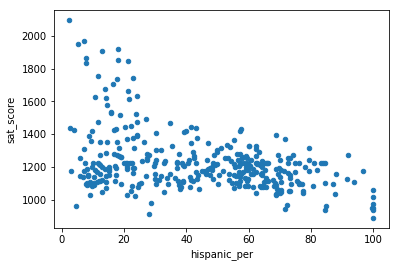

In [63]:
combined.plot.scatter("hispanic_per", "sat_score")

In [64]:
print(combined[combined["hispanic_per"] > 95]["SCHOOL NAME"])

'''
The schools listed above appear to primarily be geared towards recent immigrants to the US. These schools have a lot of students who are learning English, which would explain the lower SAT scores.
'''

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


In [65]:
print(combined[(combined["hispanic_per"] < 10) & (combined["sat_score"] > 1800)]["SCHOOL NAME"])

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


In [ ]:
'''
Many of the schools above appear to be specialized science and technology 
schools that receive extra funding, 
and only admit students who pass an entrance exam. 
This doesn't explain the low hispanic_per, 
but it does explain why their students tend to do better on the SAT -- 
they are students from 
all over New York City who did well on a standardized test.

'''

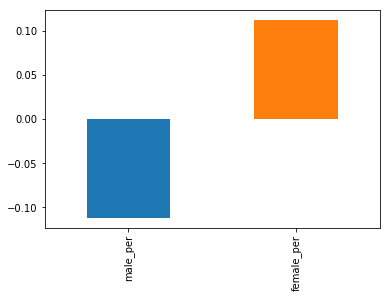

In [66]:
# Gender differences in SAT scores

gender_fields = ["male_per", "female_per"]
combined.corr()["sat_score"][gender_fields].plot.bar()

'''
In the plot above, we can see that a high percentage of females at a 
school positively correlates with SAT score, 
whereas a high percentage of males at a school negatively correlates with SAT score. 
Neither correlation is extremely strong.
'''

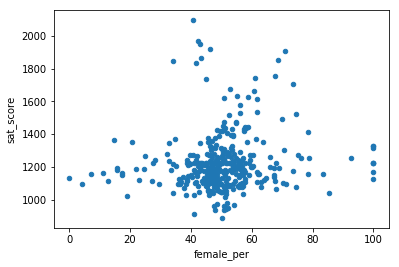

In [67]:

combined.plot.scatter("female_per", "sat_score")

'''

Based on the scatterplot, there doesn't seem to be any real correlation between sat_score and female_per. However, there is a cluster of schools with a high percentage of females (60 to 80), and high SAT scores.
'''

In [68]:
print(combined[(combined["female_per"] > 60) & (combined["sat_score"] > 1700)]["SCHOOL NAME"])

'''
These schools appears to be very selective liberal arts schools
that have high academic standards.
'''


5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


In [ ]:
# AP Exam Scores vs SAT Scores

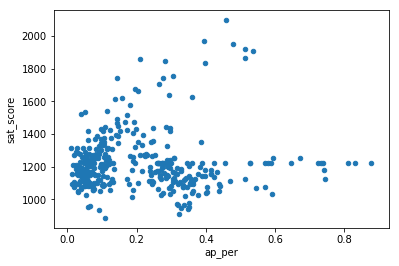

In [69]:

combined["ap_per"] = combined["AP Test Takers "] / combined["total_enrollment"]

combined.plot.scatter(x='ap_per', y='sat_score')